## Credit Fraud Detection

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [70]:
df=pd.read_csv(r'C:\Users\SPECTRE\Desktop\CodSoft_Internship\Material and Dataset\Credit card fraud detection\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [71]:
df.shape

(284807, 31)

In [72]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [73]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]


In [74]:
df.shape

(284807, 31)

In [75]:
normal.shape

(284315, 31)

In [76]:
fraud.shape

(492, 31)

In [77]:
outlier=len(fraud)/float(len(normal))
print(outlier)

0.0017304750013189597


In [78]:
print("Fraud Credit Cases : {}".format(len(fraud)))

print("Normal Credit Cases : {}".format(len(normal)))



Fraud Credit Cases : 492
Normal Credit Cases : 284315


In [79]:
normal_sample=normal.sample(n=492)

In [80]:
df1=pd.concat([normal_sample, fraud],axis=0)

In [81]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
273234,165497.0,0.390610,0.697257,-0.470357,-0.094604,0.679897,-1.343115,1.297880,-0.534797,0.161180,...,0.300458,1.082170,-0.065361,-0.037024,-0.644705,-0.229069,-0.010040,-0.067850,48.60,0
75867,56284.0,1.260631,0.254750,0.512693,0.619460,-0.472975,-0.989162,0.066095,-0.208911,0.035866,...,-0.257002,-0.740074,0.135206,0.376444,0.220136,0.094653,-0.028653,0.019110,1.79,0
169770,119852.0,-0.529127,0.240728,1.751979,0.761905,0.438201,0.553619,0.283446,0.147002,-0.183826,...,0.334403,0.963684,-0.127783,0.671129,-0.127148,-0.448748,-0.002979,-0.064543,57.00,0
221327,142524.0,-0.024058,0.906787,-0.512677,-0.332816,1.178407,-0.906475,1.059598,-0.243177,-0.164214,...,0.310699,0.979393,-0.277950,-0.778441,-0.401227,-0.114718,0.224558,0.239336,19.99,0
75276,55982.0,-1.837601,-1.135108,1.900331,-0.764460,0.358179,0.048941,0.126958,0.331490,0.637466,...,0.001609,-0.286963,0.485059,-0.408832,0.070012,0.853093,0.178850,0.180917,205.69,0


In [82]:
df1.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [83]:
df1['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [84]:
df1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95657.186992,0.032776,-0.049384,0.148868,0.117775,-0.001240,-0.004606,-0.022383,0.033142,-0.009358,...,0.000912,0.042752,0.014064,0.018095,0.024522,0.023560,-0.006965,0.007056,0.003851,85.251057
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Axes: >

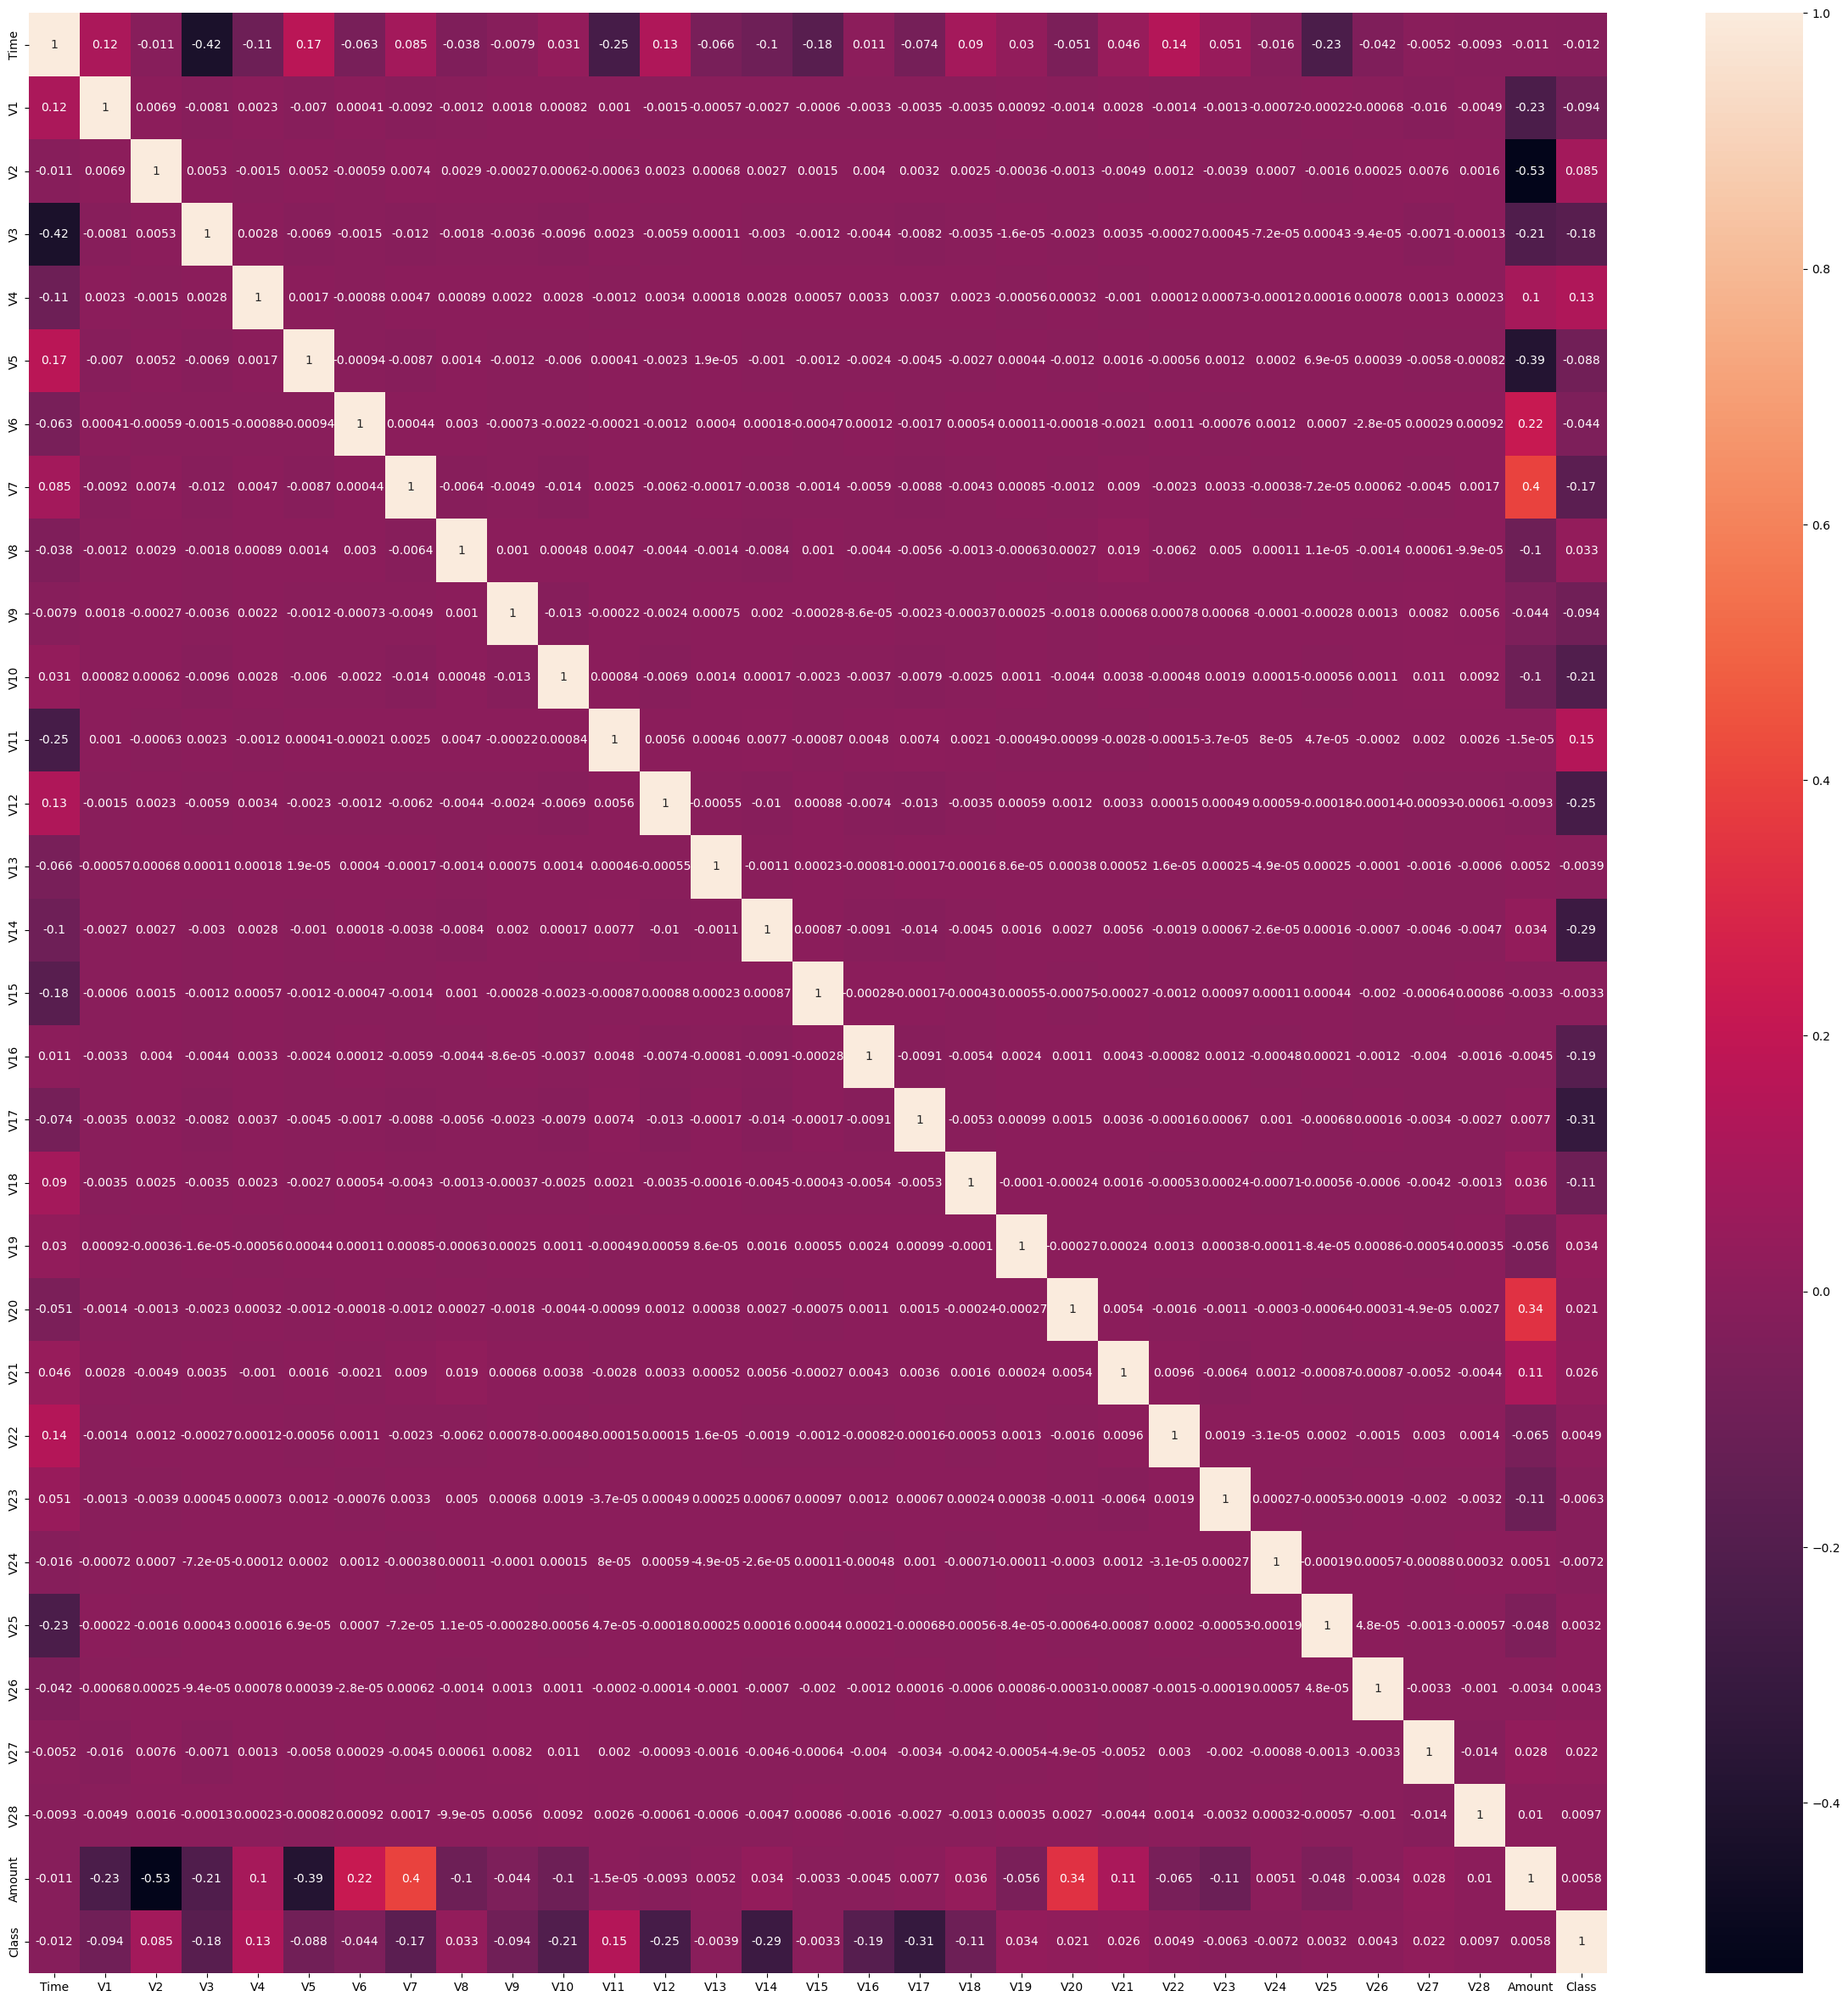

In [41]:
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(30,30))
sns.heatmap(df1[top_corr_features].corr(),annot=True)

In [85]:
X=df1.drop(columns='Class',axis=1)
Y=df1['Class']

In [86]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
273234  165497.0  0.390610  0.697257 -0.470357 -0.094604  0.679897 -1.343115   
75867    56284.0  1.260631  0.254750  0.512693  0.619460 -0.472975 -0.989162   
169770  119852.0 -0.529127  0.240728  1.751979  0.761905  0.438201  0.553619   
221327  142524.0 -0.024058  0.906787 -0.512677 -0.332816  1.178407 -0.906475   
75276    55982.0 -1.837601 -1.135108  1.900331 -0.764460  0.358179  0.048941   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [87]:
print(Y)

273234    0
75867     0
169770    0
221327    0
75276     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [97]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [98]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(984, 30)
(787, 30)
(197, 30)


In [99]:
model=LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [100]:
train_predict=model.predict(X_train)
train_accuracy=accuracy_score(train_predict, Y_train)

In [101]:
print("Accuracy on Training data:",train_accuracy)

Accuracy on Training data: 0.9491740787801779


In [102]:
test_predict=model.predict(X_test)
test_accuracy=accuracy_score(test_predict, Y_test)

In [103]:
print("Accuracy on Test data:",test_accuracy)

Accuracy on Test data: 0.9441624365482234
